In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed
import seaborn as sns
import pandas as pd

# Análisis Comparativo del Desempeño de Algoritmos Evolutivos

# Función a Optimizar: Eggholder

## Forma General:

$$
f(x_1,x_2) = -(x_2 + 47) \sin\left(\sqrt{\left| x_2 + \frac{x_1}{2} + 47\right|}\right) - x_1 \sin\left(\sqrt{\left|x_1 - (x_2 + 47)\right|}\right)
$$

## Gráfica de la Función:

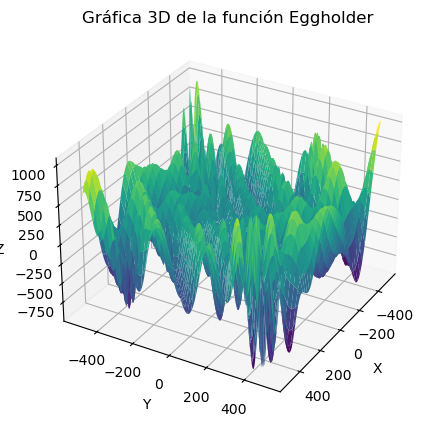

In [6]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)

# Cálculo de la función Eggholder
Z = eggholder(X, Y)

# Gráfica 3D
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Eggholder')
    plt.show()

plot_3d()

# Algoritmos de Optimización

## Optimización por Algoritmos Genéticos

Mejor solución: x = 511.9556854833808, y = 405.50256258665877, f(x, y) = -957.5219462802368


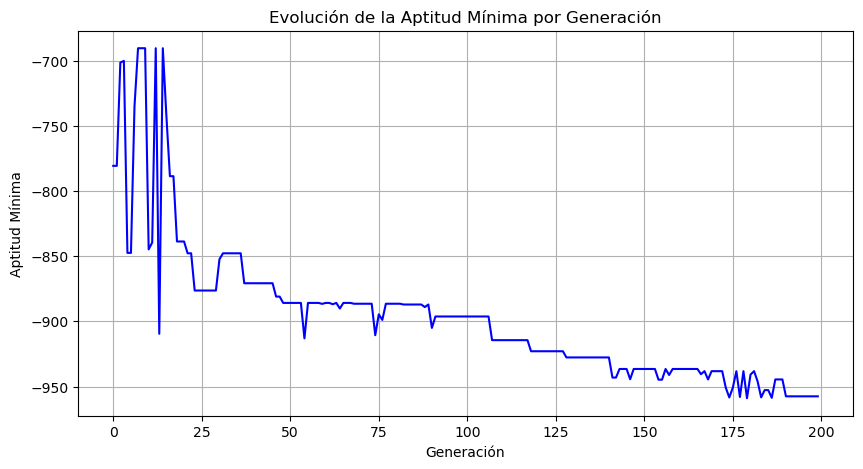

In [14]:
# Inicialización de la población
def inicializar_poblacion(tam_poblacion):
    # Genera coordenadas (x, y) dentro del rango [-512, 512]
    return np.random.uniform(-512, 512, (tam_poblacion, 2))

# Evaluación de la población
def evaluar_poblacion(poblacion):
    # Calcula el valor de la función Eggholder para cada individuo
    return np.array([eggholder(ind[0], ind[1]) for ind in poblacion])

# Selección de los padres mediante torneo
def seleccion_por_torneo(poblacion, aptitudes, num_padres):
    padres = np.empty((num_padres, poblacion.shape[1]))
    for i in range(num_padres):
        idx1, idx2 = np.random.randint(0, poblacion.shape[0], size=2)
        idx_ganador = idx1 if aptitudes[idx1] < aptitudes[idx2] else idx2
        padres[i, :] = poblacion[idx_ganador, :]
    return padres

# Cruzamiento
def cruzamiento(padres, num_descendientes):
    descendientes = np.empty((num_descendientes, padres.shape[1]))
    punto_cruzamiento = np.uint8(padres.shape[1]/2)
    for k in range(num_descendientes):
        idx_padre1 = k % padres.shape[0]
        idx_padre2 = (k+1) % padres.shape[0]
        descendientes[k, 0:punto_cruzamiento] = padres[idx_padre1, 0:punto_cruzamiento]
        descendientes[k, punto_cruzamiento:] = padres[idx_padre2, punto_cruzamiento:]
    return descendientes

# Mutación
def mutacion(descendientes):
    for idx in range(descendientes.shape[0]):
        if np.random.rand() < 0.1: # Probabilidad de mutación
            cambio = np.random.uniform(-50, 50)
            eje = np.random.randint(0, descendientes.shape[1])
            descendientes[idx, eje] += cambio
    return descendientes

# Algoritmo genético
def algoritmo_genetico(tam_poblacion, num_generaciones, num_padres):
    historial_aptitudes = []
    poblacion = inicializar_poblacion(tam_poblacion)
    for generacion in range(num_generaciones):
        aptitudes = evaluar_poblacion(poblacion)
        historial_aptitudes.append(aptitudes.min())
        padres = seleccion_por_torneo(poblacion, aptitudes, num_padres)
        descendientes = cruzamiento(padres, tam_poblacion - num_padres)
        descendientes_mutados = mutacion(descendientes)
        poblacion[0:num_padres, :] = padres
        poblacion[num_padres:, :] = descendientes_mutados
    # Retorna el mejor resultado
    aptitudes_finales = evaluar_poblacion(poblacion)
    mejor_idx = np.argmin(aptitudes_finales)
    return poblacion[mejor_idx, :], aptitudes_finales[mejor_idx], historial_aptitudes

# Parámetros del algoritmo genético
tam_poblacion = 100
num_generaciones = 200
num_padres = 40

# Ejecución del algoritmo genético
mejor_solucion, mejor_aptitud, historial_aptitudes = algoritmo_genetico(tam_poblacion, num_generaciones, num_padres)
print(f"Mejor solución: x = {mejor_solucion[0]}, y = {mejor_solucion[1]}, f(x, y) = {mejor_aptitud}")

# Gráfica de la evolución de la aptitud
plt.figure(figsize=(10, 5))
plt.plot(historial_aptitudes, color='blue')
plt.title('Evolución de la Aptitud Mínima por Generación')
plt.xlabel('Generación')
plt.ylabel('Aptitud Mínima')
plt.grid(True)
plt.show()


### Ejecutamos el algoritmo 20 veces para obtener una muestra de resultados

In [24]:
# Muestra de soluciones encontradas por el algoritmo genético
soluciones_GA = np.array([])

# Ejecución del algoritmo genético 20 veces
for _ in range(20):
    mejor_solucion, mejor_aptitud, _ = algoritmo_genetico(tam_poblacion, num_generaciones, num_padres)
    soluciones_GA = np.append(soluciones_GA, [mejor_aptitud])

print(f"Soluciones encontradas por el algoritmo genético: {soluciones_GA}")

Soluciones encontradas por el algoritmo genético: [-920.74271995 -894.57884219 -928.12202403 -896.16901992 -934.09727316
 -888.6677139  -954.62198782 -894.57609298 -894.51870946 -716.66532626
 -888.87653038 -538.7675649  -955.17784578 -715.56206424 -922.14073521
 -888.91645114 -737.1791807  -894.57067576 -896.28480958 -888.83540733]


#### Crearemos un dataFrame que utilizaremos para comparar los resultados de todos los algoritmos más adelante

In [25]:
# Creamos un dataframe donde cada columna representa un algoritmo y cada fila la serie de soluciones encontradas
df = pd.DataFrame({
    'Algoritmo Genético': soluciones_GA
})

df

,Algoritmo Genético
0,-920.742720
1,-894.578842
2,-928.122024
3,-896.169020
4,-934.097273
5,-888.667714
6,-954.621988
7,-894.576093
8,-894.518709
9,-716.665326


## Optimización por Colonia de Hormigas

La mejor solución encontrada está en [505.49793001 401.97059978] con un valor de -916.0840206079922


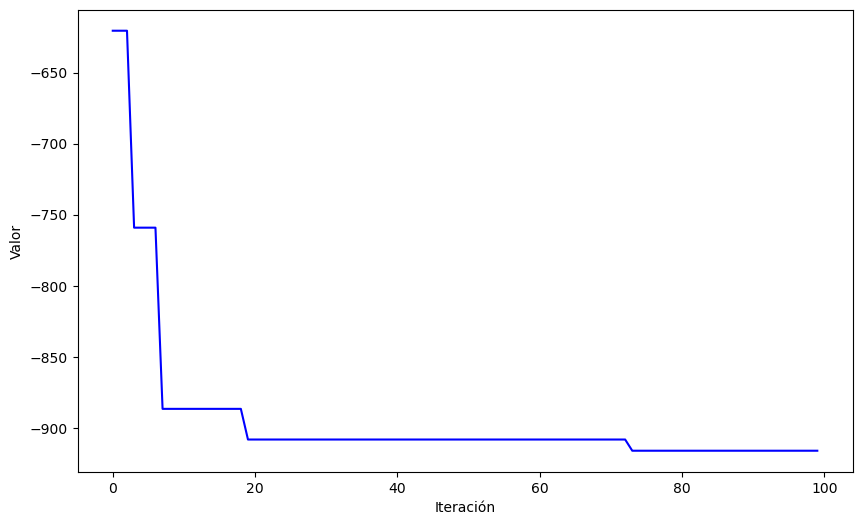

In [26]:
# Parámetros dados por el algoritmo

n = 2  # dos dimensiones para la función Eggholder
alpha = 1  # importancia de la cantidad de feromona
beta = 0  # en este caso, no usaremos una función heurística
rho = 0.1  # tasa de evaporación
Q = 1  # constante de depósito
num_hormigas = 30  # número de hormigas
num_iteraciones = 100  # número de iteraciones
B = 30  # número de intervalos discretizados por dimensión
tau_0 = 0.1  # feromona inicial

# Función Eggholder redefinida para la discretización
def eggholder(x):
    x1, x2 = x
    return -(x2 + 47) * np.sin(np.sqrt(abs(x2 + x1/2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

# Discretización del espacio de búsqueda
x_min, x_max = -512, 512
y_min, y_max = -512, 512
x_grid = np.linspace(x_min, x_max, B)
y_grid = np.linspace(y_min, y_max, B)
intervalos = np.array([x_grid, y_grid])

# Inicialización de feromonas
tau = np.ones((n, B - 1)) * tau_0

# Algoritmo AS
mejor_sol_global = None
mejor_costo_global = float('inf')
historial_optimos = []

for it in range(num_iteraciones):
    soluciones = []
    optimos = np.zeros(num_hormigas)
    
    # Construcción de la solución por cada hormiga
    for k in range(num_hormigas):
        sol = np.zeros(n)
        for i in range(n):
            # Seleccionamos el intervalo basado en las feromonas
            p = tau[i] ** alpha / np.sum(tau[i] ** alpha)
            intervalo = np.random.choice(range(B - 1), p=p)
            sol[i] = np.random.uniform(intervalos[i][intervalo], intervalos[i][intervalo + 1])

        optimo = eggholder(sol)
        soluciones.append(sol)
        optimos[k] = optimo
        
        # Actualización de la mejor solución global
        if optimo < mejor_costo_global:
            mejor_sol_global = sol
            mejor_costo_global = optimo

    historial_optimos.append(mejor_costo_global)
    
    # Actualización de la feromona
    for i in range(n):
        for j in range(B - 1):
            tau[i, j] = (1 - rho) * tau[i, j]
            if np.any([np.allclose(sol[i], intervalos[i, j]) for sol in soluciones]):
                tau[i, j] += Q / mejor_costo_global

# Imprimir la mejor solución encontrada
print(f"La mejor solución encontrada está en {mejor_sol_global} con un valor de {mejor_costo_global}")

# Gráfica del historial de soluciones
plt.figure(figsize=(10, 6))
plt.plot(historial_optimos, linestyle='-', color='b')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.show()

### Ejecutamos el algoritmo 20 veces para obtener una muestra de resultados

En este caso el algoritmo de optimización por colonia de hormigas es computacionalmente costoso y cometí un error en la implementación que ocasionalmente genera posibilidades negativas, por lo que ejecutarlo en un ciclo no fue posible. Sin embargo, lo ejecuté 20 veces manualmente y obtuve los siguientes resultados:

In [27]:
soluciones_ACO = [-881.886455524778, -958.0391556376042, -926.3072812993651, -884.0207747063429, -931.6002248927856, 
                  -915.9025185677523, -900.2933400454475, -935.2752662816401, -941.100843274905, -907.9379872733446, 
                  -882.6799666936909, -932.8955786768906, -911.8443083588622, -937.2134494460722, -926.318346287987,
                  -889.2665863487766, -902.9095465863666, -932.1296628978889, -886.8443272493407, -913.8191021626528]

soluciones_ACO = np.array(soluciones_ACO)
print(f"Soluciones encontradas por el algoritmo de colonia de hormigas: {soluciones_ACO}")

Soluciones encontradas por el algoritmo de colonia de hormigas: [-881.88645552 -958.03915564 -926.3072813  -884.02077471 -931.60022489
 -915.90251857 -900.29334005 -935.27526628 -941.10084327 -907.93798727
 -882.67996669 -932.89557868 -911.84430836 -937.21344945 -926.31834629
 -889.26658635 -902.90954659 -932.1296629  -886.84432725 -913.81910216]


### Actualizamos el dataFrame con los resultados del algoritmo de colonia de hormigas

In [30]:
df['Colonia de Hormigas'] = soluciones_ACO

## Optimización por Enjambre de Partículas

La mejor solución encontrada por el algoritmo PSO es [439.3902673  453.88670375] con un valor de -935.3363343184528


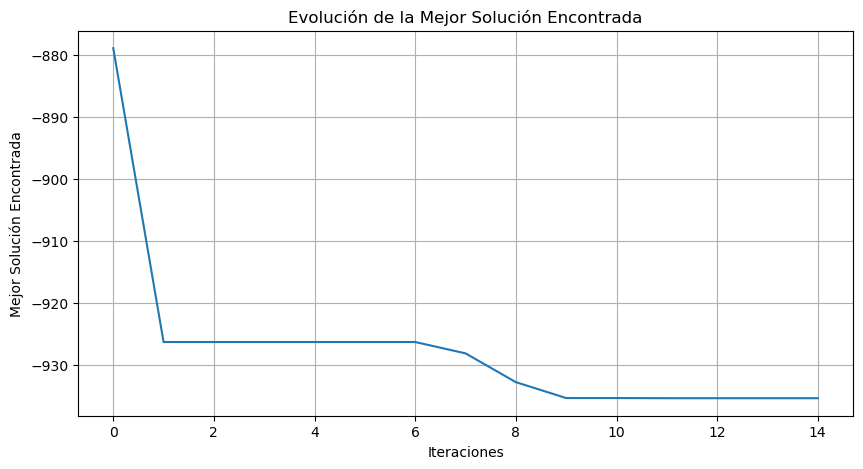

In [62]:
def PSO():
    # Definir los límites de la función
    bounds = [(-512, 512), (-512, 512)]

    # Parametros del PSO
    n_particles = 100
    n_iterations = 15
    phi1_max = 0.5
    phi2_max = 0.5
    v_max = 100
    w = 0.5  # Peso de la inercia

    # Inicialización de las partículas
    seed(np.random.randint(0, 1000))
    particles = np.array([np.array([random() * (bounds[0][1] - bounds[0][0]) + bounds[0][0],
                                    random() * (bounds[1][1] - bounds[1][0]) + bounds[1][0]])
                        for _ in range(n_particles)])
    velocities = np.zeros_like(particles)
    pbest_positions = particles.copy()
    pbest_scores = np.array([eggholder(p[0], p[1]) for p in particles])
    gbest_position = pbest_positions[np.argmin(pbest_scores)]
    gbest_score = np.min(pbest_scores)

    # Lista para Guardar el Historial de las Mejores Soluciones encontradas
    best_scores = []

    # Algoritmo PSO
    for t in range(n_iterations):
        for i in range(n_particles):
            # Actualizar la Velocidad de las Partículas
            r1, r2 = random(), random()
            velocities[i] = (w * velocities[i] +
                            phi1_max * r1 * (pbest_positions[i] - particles[i]) +
                            phi2_max * r2 * (gbest_position - particles[i]))
            # Aplicar los límtes de Velocidad
            velocities[i] = np.clip(velocities[i], -v_max, v_max)
            
            # Actualizar la Posición de las Partículas
            particles[i] += velocities[i]
            # Aplicar los limites 
            particles[i] = np.clip(particles[i], [b[0] for b in bounds], [b[1] for b in bounds])
            
            # Evaluar las partículas
            fitness = eggholder(particles[i][0], particles[i][1])
            
            # Actualizar el Mejor Personal
            if fitness < pbest_scores[i]:
                pbest_positions[i] = particles[i]
                pbest_scores[i] = fitness
                
            # Actualizar el Mejor Global
            if fitness < gbest_score:
                gbest_position = particles[i]
                gbest_score = fitness
                
        # Trackear la Evolución de la Mejor Solución Encontrada
        best_scores.append(gbest_score)

    # Solución Final y Coordenadas
    gbest_position, gbest_score
    return gbest_score, gbest_position, best_scores

# Ejecutar el Algoritmo PSO
best_score, best_position, best_scores = PSO()

print(f"La mejor solución encontrada por el algoritmo PSO es {best_position} con un valor de {best_score}")

# Graficar la Evolución de la Mejor Solución Encontrada
plt.figure(figsize=(10, 5))
plt.plot(best_scores)
plt.xlabel('Iteraciones')
plt.ylabel('Mejor Solución Encontrada')
plt.title('Evolución de la Mejor Solución Encontrada')
plt.grid(True)
plt.show()

### Ejecutamos el algoritmo 20 veces para obtener una muestra de resultados

In [64]:
soluciones_PSO = np.array([])
for i in range(20):
    best_score, best_position, _ = PSO()
    soluciones_PSO = np.append(soluciones_PSO, [best_score])

print(f"Soluciones encontradas por el algoritmo PSO: {soluciones_PSO}")

Soluciones encontradas por el algoritmo PSO: [-716.1642263  -716.08989213 -888.89047525 -894.57695217 -894.57370967
 -894.50447953 -888.72473488 -888.93582343 -888.90992208 -894.57749669
 -959.64013514 -894.54772419 -753.01971734 -894.53730813 -959.64045004
 -716.64853667 -894.57730163 -894.56568765 -893.50421803 -935.33633432]


#### Actualizamos el DataFrame con los resultados del algoritmo de enjambre de partículas

In [68]:
df['PSO'] = soluciones_PSO

## Optimización por Evolución Diferencial

La mejor solución encontrada por el algoritmo DE es [484.40691304 438.5911712 ] con un valor de -952.8485975753766


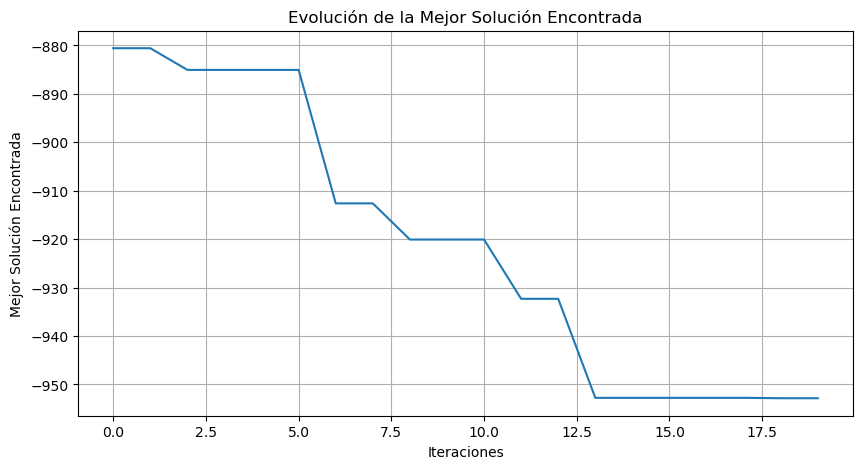

In [75]:
def DE():
    # Definir los límites de la función
    bounds = [(-512, 512), (-512, 512)]

    # Parametros del PSO
    n_particles = 100
    n_iterations = 20
    phi1_max = 0.5
    phi2_max = 0.5
    v_max = 100
    w = 0.5  # Peso de la inercia

    # Inicialización de las partículas
    seed(np.random.randint(0, 1000))
    particles = np.array([np.array([random() * (bounds[0][1] - bounds[0][0]) + bounds[0][0],
                                    random() * (bounds[1][1] - bounds[1][0]) + bounds[1][0]])
                        for _ in range(n_particles)])
    velocities = np.zeros_like(particles)
    pbest_positions = particles.copy()
    pbest_scores = np.array([eggholder(p[0], p[1]) for p in particles])
    gbest_position = pbest_positions[np.argmin(pbest_scores)]
    gbest_score = np.min(pbest_scores)

    # Lista para Guardar el Historial de las Mejores Soluciones encontradas
    best_scores = []

    # Algoritmo PSO
    for t in range(n_iterations):
        for i in range(n_particles):
            # Actualizar la Velocidad de las Partículas
            r1, r2 = random(), random()
            velocities[i] = (w * velocities[i] +
                            phi1_max * r1 * (pbest_positions[i] - particles[i]) +
                            phi2_max * r2 * (gbest_position - particles[i]))
            # Aplicar los límtes de Velocidad
            velocities[i] = np.clip(velocities[i], -v_max, v_max)
            
            # Actualizar la Posición de las Partículas
            particles[i] += velocities[i]
            # Aplicar los limites 
            particles[i] = np.clip(particles[i], [b[0] for b in bounds], [b[1] for b in bounds])
            
            # Evaluar las partículas
            fitness = eggholder(particles[i][0], particles[i][1])
            
            # Actualizar el Mejor Personal
            if fitness < pbest_scores[i]:
                pbest_positions[i] = particles[i]
                pbest_scores[i] = fitness
                
            # Actualizar el Mejor Global
            if fitness < gbest_score:
                gbest_position = particles[i]
                gbest_score = fitness
                
        # Trackear la Evolución de la Mejor Solución Encontrada
        best_scores.append(gbest_score)

    return gbest_position, gbest_score, best_scores


# Ejecutar el Algoritmo PSO
best_position, best_score, best_scores = DE()

print(f"La mejor solución encontrada por el algoritmo DE es {best_position} con un valor de {best_score}")

# Graficar la Evolución de la Mejor Solución Encontrada
plt.figure(figsize=(10, 5))
plt.plot(best_scores)
plt.xlabel('Iteraciones')
plt.ylabel('Mejor Solución Encontrada')
plt.title('Evolución de la Mejor Solución Encontrada')
plt.grid(True)
plt.show()

### Ejecutamos el algoritmo 20 veces para obtener una muestra de resultados

In [76]:
soluciones_DE = np.array([])
for i in range(20):
    best_position, best_score, _ = DE()
    soluciones_DE = np.append(soluciones_DE, [best_score])

print(f"Soluciones encontradas por el algoritmo DE: {soluciones_DE}")

Soluciones encontradas por el algoritmo DE: [-935.33757523 -894.57841053 -894.57709114 -716.67016446 -718.16723626
 -935.33779844 -894.55715758 -786.52368499 -894.57498112 -716.67129455
 -935.33588514 -935.33688365 -888.94801775 -935.32496848 -894.57888231
 -894.57880832 -716.14244359 -956.9087869  -888.93885159 -718.16745602]


#### Actualizamos el DataFrame con los resultados del algoritmo de evolución diferencial

In [79]:
df['Differential Evolution'] = soluciones_DE

## Sistemas Inmunes Artificiales (Clone Selection Algorithm)

La mejor solución encontrada por el algoritmo Clonalg es [512.         404.90955702] con un valor de -959.1161669943295


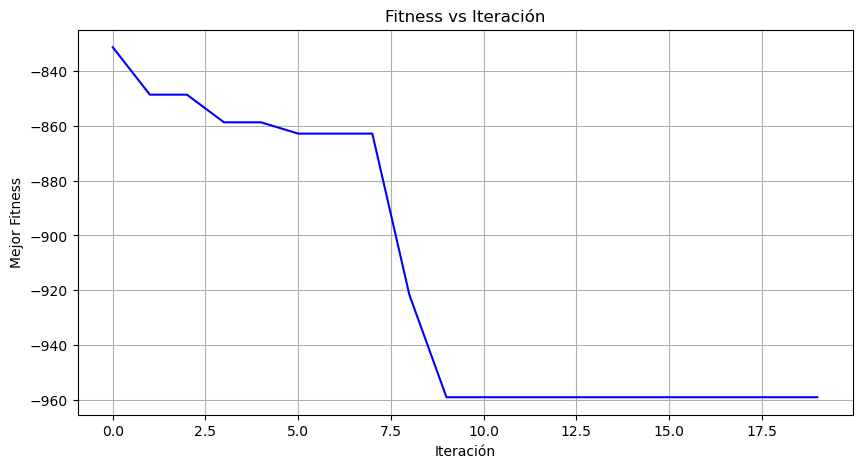

In [88]:
def clonalg(function, bounds, num_particles, num_clones, num_iterations):
    # Inicializar población aleatoriamente dentro de los límites
    population = np.random.rand(num_particles, len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    
    # Función para evaluar la población
    def evaluate_population(population):
        return np.array([function(*individual) for individual in population])
    
    # Historial de la mejor solución
    history = []
    
    # Evolución del algoritmo
    best_solution = None
    best_fitness = np.inf
    
    for _ in range(num_iterations):
        # Evaluar la aptitud de la población
        fitness = evaluate_population(population)
        
        # Selección de los mejores individuos
        best_indices = np.argsort(fitness)
        best_individuals = population[best_indices[:num_clones]]
        best_individual_fitness = fitness[best_indices[0]]
        
        # Actualizar la mejor solución encontrada
        if best_individual_fitness < best_fitness:
            best_fitness = best_individual_fitness
            best_solution = best_individuals[0]
        
        # Registrar el mejor fitness
        history.append(best_fitness)
        
        # Clonación y mutación
        clones = np.repeat(best_individuals, num_particles // num_clones, axis=0)
        mutation_scale = 0.1 * (bounds[:, 1] - bounds[:, 0])
        mutation = np.random.randn(*clones.shape) * mutation_scale
        mutated_clones = np.clip(clones + mutation, bounds[:, 0], bounds[:, 1])  # Asegurarse de que permanezcan dentro de los límites
        
        # Reemplazar la población con clones mutados y algunos nuevos individuos
        population = np.vstack([mutated_clones, np.random.rand(num_particles - len(mutated_clones), len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]])
    
    return best_solution, best_fitness, history

# Definición de límites para las variables x e y
bounds = np.array([[-512, 512], [-512, 512]])

# Ejecutar Clonalg con historial
best_solution, best_fitness, history = clonalg(eggholder, bounds, num_particles=100, num_clones=20, num_iterations=20)

print(f"La mejor solución encontrada por el algoritmo Clonalg es {best_solution} con un valor de {best_fitness}")

# Gráfica del historial de las mejores soluciones
plt.figure(figsize=(10, 5))
plt.plot(history, linestyle='-', color='b')
plt.title('Fitness vs Iteración')
plt.xlabel('Iteración')
plt.ylabel('Mejor Fitness')
plt.grid(True)
plt.show()


### Ejecutamos el algoritmo 20 veces para obtener una muestra de resultados

In [89]:
soluciones_AIS = np.array([])

for i in range(20):
    best_solution, best_fitness, _ = clonalg(eggholder, bounds, num_particles=100, num_clones=20, num_iterations=20)
    soluciones_AIS = np.append(soluciones_AIS, [best_fitness])

print(f"Soluciones encontradas por el algoritmo Clonalg: {soluciones_AIS}")

Soluciones encontradas por el algoritmo Clonalg: [-959.55394834 -929.02996733 -958.83254826 -959.61080027 -887.9932815
 -959.54242541 -927.72845057 -958.82548459 -905.94875567 -959.38218987
 -958.05481365 -885.42818994 -955.30231332 -957.85281838 -888.45325972
 -959.25553942 -933.68155125 -959.30364929 -959.45570618 -957.5230953 ]


#### Actualizamos el DataFrame con los resultados del algoritmo de Sistemas Inmunes Artificiales

In [92]:
df['Clonalg'] = soluciones_AIS

### Este es nuestro DataFrame final con los resultados de todos los algoritmos

In [93]:
df

,Algoritmo Genético,Colonia de Hormigas,PSO,Differential Evolution,Clonalg
0,-920.742720,-881.886456,-716.164226,-935.337575,-959.553948
1,-894.578842,-958.039156,-716.089892,-894.578411,-929.029967
2,-928.122024,-926.307281,-888.890475,-894.577091,-958.832548
3,-896.169020,-884.020775,-894.576952,-716.670164,-959.610800
4,-934.097273,-931.600225,-894.573710,-718.167236,-887.993282
5,-888.667714,-915.902519,-894.504480,-935.337798,-959.542425
6,-954.621988,-900.293340,-888.724735,-894.557158,-927.728451
7,-894.576093,-935.275266,-888.935823,-786.523685,-958.825485
8,-894.518709,-941.100843,-888.909922,-894.574981,-905.948756
9,-716.665326,-907.937987,-894.577497,-716.671295,-959.382190


# Analis Comparativo

In [96]:
# Comparación de los algoritmos
df.describe()

,Algoritmo Genético,Colonia de Hormigas,PSO,Differential Evolution,Clonalg
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-862.453549,-914.914236,-868.098256,-857.562819,-941.037939
std,104.120952,22.435243,76.647780,90.002946,27.462964
min,-955.177846,-958.039156,-959.640450,-956.908787,-959.610800
25%,-921.092224,-932.321142,-894.577040,-935.327698,-959.323284
50%,-894.573384,-914.860810,-894.520894,-894.576036,-957.953816
75%,-888.793484,-897.536652,-888.849040,-769.434628,-928.704588
max,-538.767565,-881.886456,-716.089892,-716.142444,-885.428190


<Axes: title={'center': 'Comparación de Algoritmos de Optimización'}>

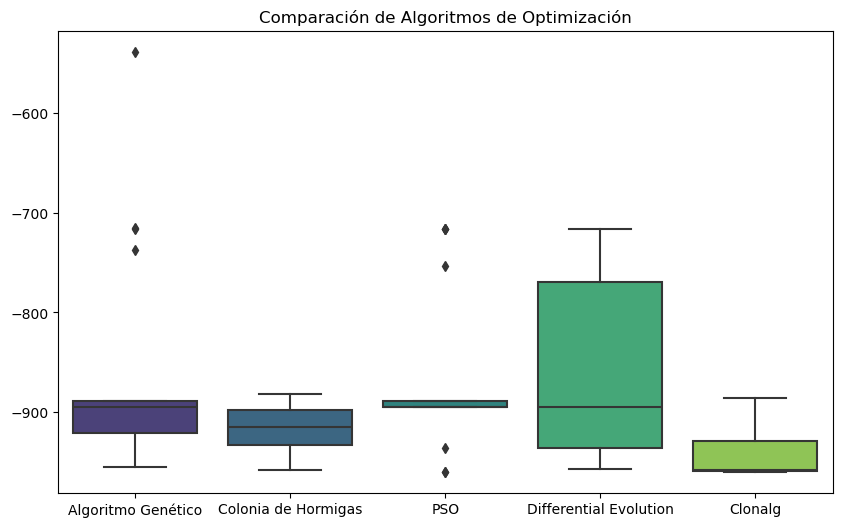

In [101]:
# Gráfica de caja y bigotes
plt.figure(figsize=(10, 6))
plt.title('Comparación de Algoritmos de Optimización')
sns.boxplot(data=df, orient='v', palette='viridis')

## Prueba de Signo 

In [125]:
from scipy.stats import binom_test, wilcoxon, friedmanchisquare



In [136]:
# Lista de algoritmos a comparar
algorithms = df.columns
pairs = [(alg1, alg2) for i, alg1 in enumerate(algorithms) for alg2 in algorithms[i+1:]]

# Funcion para realizar la prueba de signo
def sign_test(data1, data2):
    diff = data1 - data2
    positives = sum(diff > 0)
    negatives = sum(diff < 0)
    p_value = binom_test(min(positives, negatives), n=positives+negatives, p=0.5, alternative='two-sided')
    result = '+' if p_value < 0.05 else '-'
    return positives, negatives, p_value, result

# Dataframe para guardar los resultados
results = []

for alg1, alg2 in pairs:
    pos, neg, p_value, result = sign_test(df[alg1], df[alg2])
    results.append([alg1, alg2, pos, neg, p_value, result])

# Resultados de la prueba de signo
results_df = pd.DataFrame(results, columns=['Algoritmo 1', 'Algoritmo 2', 'Positivos', 'Negativos', 'p-value', 'Resultado'])

# Ordenar los resultados por p-value
results_df.sort_values('p-value')



C:\Users\rdzch\AppData\Local\Temp\ipykernel_9500\112812884.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(min(positives, negatives), n=positives+negatives, p=0.5, alternative='two-sided')


,Algoritmo 1,Algoritmo 2,Positivos,Negativos,p-value,Resultado
9,Differential Evolution,Clonalg,18,2,0.000402,+
3,Algoritmo Genético,Clonalg,17,3,0.002577,+
8,PSO,Clonalg,16,4,0.011818,+
4,Colonia de Hormigas,PSO,5,15,0.041389,+
6,Colonia de Hormigas,Clonalg,15,5,0.041389,+
5,Colonia de Hormigas,Differential Evolution,7,13,0.263176,-
0,Algoritmo Genético,Colonia de Hormigas,12,8,0.503445,-
1,Algoritmo Genético,PSO,8,12,0.503445,-
2,Algoritmo Genético,Differential Evolution,9,11,0.823803,-
7,PSO,Differential Evolution,11,9,0.823803,-


##  Prueba de Wilcoxon

In [138]:
# Pruena de Wilcoxon
def wilcoxon_test(data1, data2):
    stat , p_value = wilcoxon(data1, data2)
    result = '+' if p_value < 0.05 else '-'
    return p_value, result, stat

# Dataframe para guardar los resultados
results = []

for alg1, alg2 in pairs:
    p_value, result, stat = wilcoxon_test(df[alg1], df[alg2])
    results.append([alg1, alg2, stat, p_value, result])

# Resultados de la prueba de Wilcoxon
results_df = pd.DataFrame(results, columns=['Algoritmo 1', 'Algoritmo 2', 'W', 'p-value', 'Resultado'])

# Ordenar los resultados por p-value
results_df.sort_values('p-value')

,Algoritmo 1,Algoritmo 2,W,p-value,Resultado
9,Differential Evolution,Clonalg,12.0,0.000134,+
3,Algoritmo Genético,Clonalg,16.0,0.000322,+
8,PSO,Clonalg,22.0,0.001017,+
4,Colonia de Hormigas,PSO,35.0,0.007296,+
6,Colonia de Hormigas,Clonalg,47.0,0.029575,+
5,Colonia de Hormigas,Differential Evolution,48.0,0.032768,+
0,Algoritmo Genético,Colonia de Hormigas,62.0,0.113987,-
2,Algoritmo Genético,Differential Evolution,88.0,0.545876,-
1,Algoritmo Genético,PSO,100.0,0.869488,-
7,PSO,Differential Evolution,105.0,1.000000,-


## Prueba de Friedman

In [148]:
thirds = [((alg1, alg2, alg3)) for i, alg1 in enumerate(algorithms) for j, alg2 in enumerate(algorithms) for k, alg3 in enumerate(algorithms) if i < j < k]


results = []

for alg1, alg2, alg3 in thirds:
    stat, p = friedmanchisquare(df[alg1], df[alg2], df[alg3])
    if p < 0.05:
        result = '+'
    else:
        result = '-'
    results.append([alg1, alg2, alg3, stat, p, result])

results_df = pd.DataFrame(results, columns=['Algoritmo 1', 'Algoritmo 2', 'Algoritmo 3', 'Estadístico', 'p-valor', 'Resultado'])
results_df.sort_values('p-valor')


,Algoritmo 1,Algoritmo 2,Algoritmo 3,Estadístico,p-valor,Resultado
5,Algoritmo Genético,Differential Evolution,Clonalg,17.1,0.000194,+
8,Colonia de Hormigas,Differential Evolution,Clonalg,14.7,0.000643,+
9,PSO,Differential Evolution,Clonalg,14.7,0.000643,+
4,Algoritmo Genético,PSO,Clonalg,12.9,0.001581,+
7,Colonia de Hormigas,PSO,Clonalg,12.1,0.002358,+
2,Algoritmo Genético,Colonia de Hormigas,Clonalg,11.7,0.002880,+
6,Colonia de Hormigas,PSO,Differential Evolution,5.2,0.074274,-
0,Algoritmo Genético,Colonia de Hormigas,PSO,4.9,0.086294,-
1,Algoritmo Genético,Colonia de Hormigas,Differential Evolution,2.1,0.349938,-
3,Algoritmo Genético,PSO,Differential Evolution,0.9,0.637628,-


In [150]:
quartets = [((alg1, alg2, alg3, alg4)) for i, alg1 in enumerate(algorithms) for j, alg2 in enumerate(algorithms) for k, alg3 in enumerate(algorithms) for l, alg4 in enumerate(algorithms) if i < j < k < l]

results = []

for alg1, alg2, alg3, alg4 in quartets:
    stat, p = friedmanchisquare(df[alg1], df[alg2], df[alg3], df[alg4])
    if p < 0.05:
        result = '+'
    else:
        result = '-'
    results.append([alg1, alg2, alg3, alg4, stat, p, result])

results_df = pd.DataFrame(results, columns=['Algoritmo 1', 'Algoritmo 2', 'Algoritmo 3', 'Algoritmo 4', 'Estadístico', 'p-valor', 'Resultado'])
results_df.sort_values('p-valor')

,Algoritmo 1,Algoritmo 2,Algoritmo 3,Algoritmo 4,Estadístico,p-valor,Resultado
4,Colonia de Hormigas,PSO,Differential Evolution,Clonalg,18.42,0.000360,+
2,Algoritmo Genético,Colonia de Hormigas,Differential Evolution,Clonalg,18.24,0.000392,+
3,Algoritmo Genético,PSO,Differential Evolution,Clonalg,18.06,0.000427,+
1,Algoritmo Genético,Colonia de Hormigas,PSO,Clonalg,16.38,0.000948,+
0,Algoritmo Genético,Colonia de Hormigas,PSO,Differential Evolution,5.22,0.156379,-
